# youtube_rank_visualization

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유투브_순위.csv to 유투브_순위.csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,775,490,000",655
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,581"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,925,740,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [4]:
# 구독자수(str) > 구독자수2(int) 
df['구독자수2'] = df.구독자수.apply(lambda x : int(x.replace(',', ''))) # one-time use
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,775,490,000",655,60400000
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,581",56500000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,925,740,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [5]:
def str2int(x): # multiple-time use
  return int(x.replace(',', ''))

In [6]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000,371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,775,490,000",655,60400000,655
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,581",56500000,1581
3,음악/댄스/가수,SMTOWN,"28,500,000","21,925,740,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 top20 (채널명, 비디오수) bar-graph

In [7]:
 df.sort_values(by='비디오수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,472,290,000","553,828",2500000,553828
707,뉴스/정치/사회,연합뉴스TV,"700,000","921,360,000","362,917",700000,362917
60,TV/방송,SBS Drama,"5,490,000","5,757,750,000","340,880",5490000,340880
56,TV/방송,SBS Entertainment,"5,730,000","6,677,740,000","216,786",5730000,216786
337,뉴스/정치/사회,KBS News,"1,320,000","1,848,670,000","176,412",1320000,176412
968,뉴스/정치/사회,Arirang News,"530,000","237,800,000","123,984",530000,123984
244,뉴스/정치/사회,JTBC News,"1,710,000","2,417,270,000","116,717",1710000,116717
287,뉴스/정치/사회,MBCNEWS,"1,510,000","3,402,340,000","115,638",1510000,115638
112,TV/방송,KBS Drama,"3,470,000","4,266,300,000","114,166",3470000,114166
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,684,970,000","111,502",1780000,111502


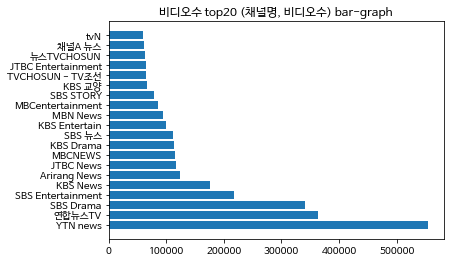

In [8]:
df2 = df.sort_values(by='비디오수2', ascending=False).head(20)

plt.title('비디오수 top20 (채널명, 비디오수) bar-graph')
plt.barh(df2.채널명, df2.비디오수2)
plt.show()

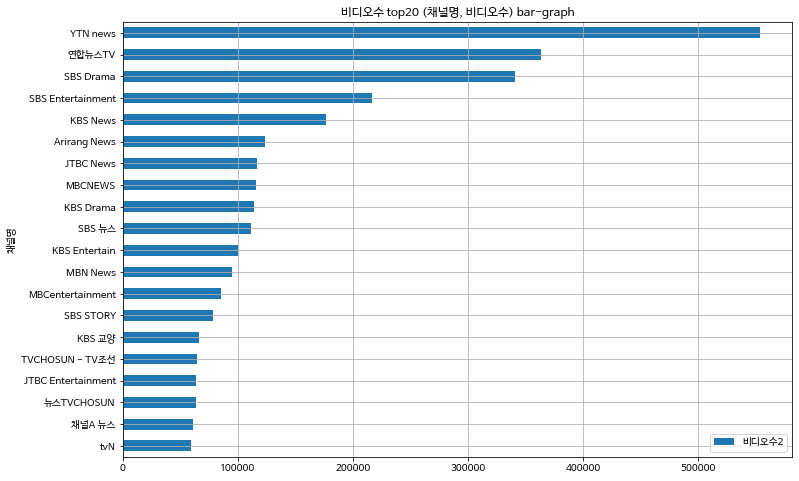

In [9]:
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 top20 (채널명, 비디오수) bar-graph')
plt.show()

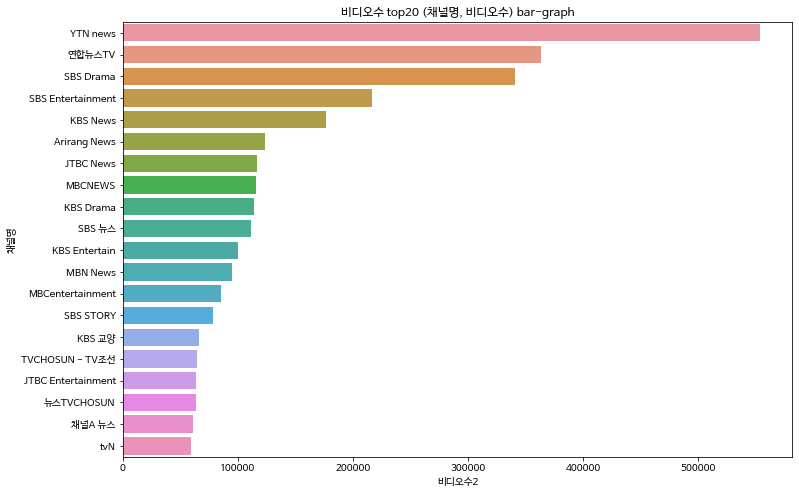

In [10]:
import seaborn as sns
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 top20 (채널명, 비디오수) bar-graph')
plt.show()

- 조회수 기준 top20 시각화

In [11]:
df3 = df[['채널명', '조회수']]
df3

,채널명,조회수
0,BLACKPINK,"19,018,090,000"
1,HYBE LABELS,"18,775,490,000"
2,BANGTANTV,"12,212,970,000"
3,SMTOWN,"21,925,740,000"
4,Boram Tube Vlog [보람튜브 브이로그],"11,052,880,000"
...,...,...
995,복지마블TV [Welfare Marble],"50,210,000"
996,OGN,"609,090,000"
997,미소,"210,780,000"
998,Muggo,"183,720,000"


In [12]:
df3.조회수 = df3.조회수.apply(str2int)
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,채널명,조회수
0,BLACKPINK,19018090000
1,HYBE LABELS,18775490000
2,BANGTANTV,12212970000
3,SMTOWN,21925740000
4,Boram Tube Vlog [보람튜브 브이로그],11052880000
...,...,...
995,복지마블TV [Welfare Marble],50210000
996,OGN,609090000
997,미소,210780000
998,Muggo,183720000


In [13]:
df3.sort_values(by='조회수', ascending=False).head(20)

,채널명,조회수
3,SMTOWN,21925740000
6,1theK (원더케이),20621630000
0,BLACKPINK,19018090000
1,HYBE LABELS,18775490000
26,MBCentertainment,14336180000
7,JYP Entertainment,13750840000
9,Mnet K-POP,12982140000
8,Coldplay,12776030000
11,KBS WORLD TV,12374030000
2,BANGTANTV,12212970000


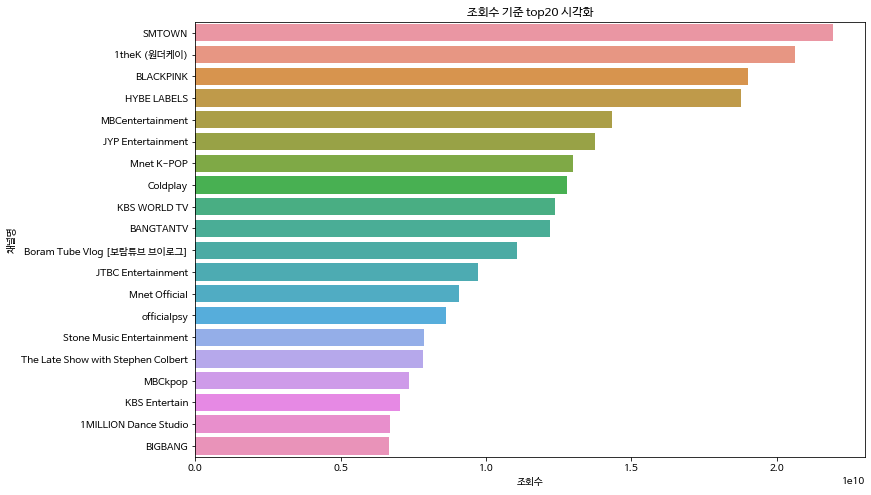

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x='조회수', y='채널명', data=df3.sort_values(by='조회수', ascending=False).head(20))
plt.title('조회수 기준 top20 시각화')
plt.show()

- the number of channel per category distribution

In [15]:
df.카테고리.value_counts().to_frame()

,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [16]:
df[['카테고리', '구독자수2']].groupby('카테고리').count()

,구독자수2
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


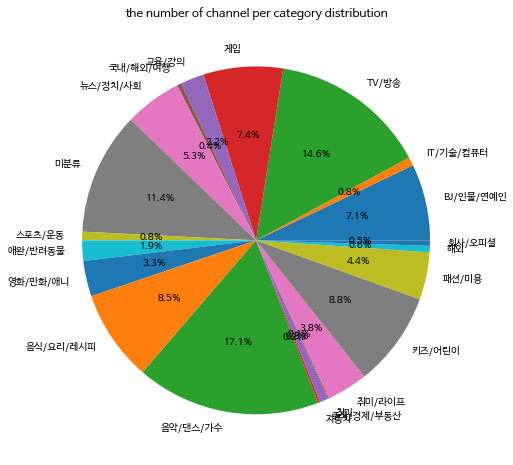

In [17]:
df3 = df[['카테고리', '구독자수2']].groupby('카테고리').count()
plt.figure(figsize=(12, 8))
plt.pie(x='구독자수2', data=df3, labels=df3.index, autopct='%1.1f%%')
plt.title('the number of channel per category distribution')
plt.show()

- number of subscriber sum per category visualization

In [18]:
df4 = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count', 'sum'])
df4.columns = ['채널수', '구독자수_합계']
df4.sort_values(by='구독자수_합계', ascending=False, inplace=True)
df4

,채널수,구독자수_합계
카테고리,,
음악/댄스/가수,171,675030000
키즈/어린이,88,257860000
TV/방송,146,229940000
음식/요리/레시피,85,180730000
미분류,114,143750000
BJ/인물/연예인,71,97640000
뉴스/정치/사회,53,71100000
게임,74,67180000
취미/라이프,38,47930000


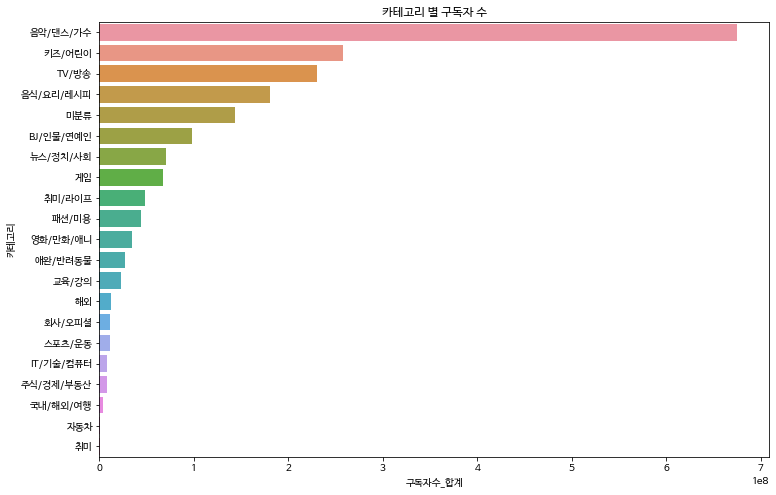

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수_합계', y=df4.index, data=df4)
plt.title('카테고리 별 구독자 수')
plt.show()